In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Monte Carlo estimation

**Problem 4a (Monte Carlo volume estimation).** In this problem our goal is to estimate the area of a unit disk. To this end, implement in Python a function that for a given $N$:
 * Uniformly samples $N$ points in a $[-1,1]\times[-1,1]$ square.
 * For each sampled point checks whether or not it lies inside a unit disk, let $X$ be the number of points inside.
 * Returns the ratio $AX/N$ (where $A=4$ is the area of the square).

Then:
 * Run your function $1000$ times for $N=1000$ and draw a histogram of the estimates.
 * What is the expected value $E(AX/N)$? What is the standard deviation?
 * Repeat the experiment, but this time sample from $[-10,10]\times[-10,10]$. Again draw a histogram, and compute the moments. Discuss the results.

**Remark:** Since we know how to compute the area of a unit disk, this exercise seems rather pointless. However, note that the exact same procedure can be used to estimate the $n$-dimensional volume of any body $S$ provided that:
 * We have a black-box that tells us whether or not a given point is in $S$.
 * We know $M$ such that $S \subseteq [-M,M]^n$ (or more generally we know a set $T$ such that we can sample uniformly from $T$ and know the volume of $T$).
 * The ratio of the volume of $S$ to the volume of $[-M,M]^n$ (or $T$) is not too small.

In [14]:
N = 1000
M = 1000


def estimate_pi(N, size=1):
    points = np.random.rand(N, 2) * 2 - 1
    points *= size
    points = np.square(points)
    counts = np.sum(points, axis=1)
    return np.mean(counts <= 1) * (size * 2) ** 2


sample1 = [estimate_pi(N) for iter in range(M)]
sample10 = [estimate_pi(N, 10) for iter in range(M)]

In [15]:
print('Sample mean for size 1:', np.mean(sample1))
print('Sample mean for size 10:', np.mean(sample10))

Sample mean for size 1: 3.14038
Sample mean for size 10: 3.088


In [16]:
print('Sampe standard deviation for size 1:', np.std(sample1))
print('Sample standard deviation for size 10:', np.std(sample10))

Sampe standard deviation for size 1: 0.05262576935304607
Sample standard deviation for size 10: 1.136281655224619


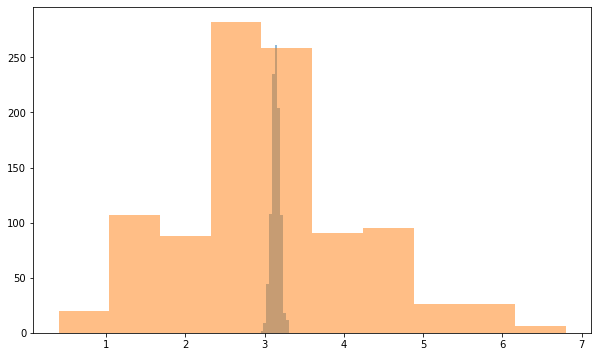

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(sample1, alpha=0.5);
plt.hist(sample10, alpha=0.5);

**Problem 4b (Monte Carlo integration).** In this problem our goal is to compute the value of a definite integral using random sampling. Let $f:[-1,1]\rightarrow\mathbb{R}$ be defined as $f(x) = 2\sqrt{1-x^2}$. Implement a Python function that for a given $N$:
 * Uniformly samples $N$ points $x_1,\ldots,x_N$ in $[-1,1]$.
 * Computes an estimate of $\int_{-1}^1 f(x)dx$ using $f(x_1),\ldots,f(x_N)$. As a part of this task you need to find a *reasonable* way to do this and argue why it works (formal proof is not required).

What is the variance and the standard deviation of your method? (This part is not required to pass the task, but please do try to figure it out!)

How is this task related to the previous one? (As above)

**Remark:** Again, the specific problem we are solving is really simple. But our method works for any function, in particular for functions $f:\mathbb{R}^n \rightarrow \mathbb{R}$. When $n$ is large, the standard quadrature-based integration breaks, but Monte Carlo approach in general still works (depending on $f$ additional variance-reducing tricks might be necessary, we will see one in the next problem).

We can express the integral of interest as an expected value of the transformed r.v.

$$E[f(X)] = \int_{-1}^{1}f(x)p(x)dx = \frac{1}{2}\int_{-1}^{1}f(x)dx $$

Sample mean: 3.139471230103972
Sample standard deviation: 0.028168681307619747


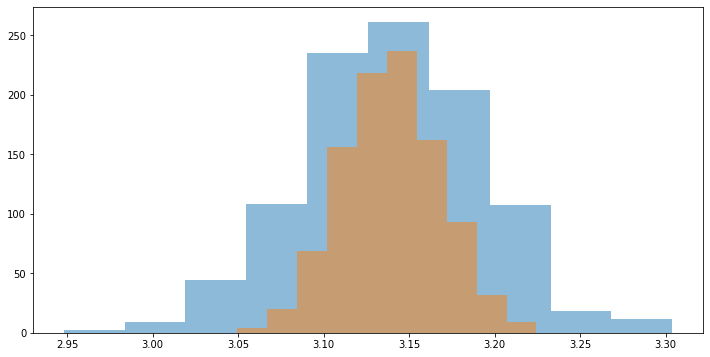

In [20]:
N = 1000
M = 1000

def estimate_int(N):
    x = 2 * np.random.rand(N) - 1
    vals = 2 * np.sqrt(1 - x * x)
    return 2 * np.mean(vals)

sample_int = [estimate_int(N) for _ in range(M)]

print('Sample mean:', np.mean(sample_int))
print('Sample standard deviation:', np.std(sample_int))

plt.figure(figsize=(12,6))
plt.hist(sample1, alpha=0.5);
plt.hist(sample_int, alpha=0.5);

**Problem 4c (Monte Carlo counting).** Consider the following problem: Given a DNF formula $\phi$, compute the number of assignments satisfying $\phi$. Doing this is #P hard, so efficient exact solutions are unlikely. But we can try finding a good estimate. Your task in this problem is to use an approach similar to the one in **Problem 4a** to find such an estimate. 

A DNF formula looks like this:
$$ \phi = (x_1 \wedge \neg x_3 \wedge x_4) \vee (\neg x_1 \wedge x_2)$$
This particular formula can be encoded using Python lists as follows:
$$ phi = [ [1,-3,4],[-1,2]]$$
You are given a sample formula below. 
 * Write a Python function that estimates the number of satisfying assignments for this formula using Monte Carlo sampling.
 * Using a histogram (or other methods) decide whether this is an efficient method.

In [3]:
#M = 4 # number of variables
#phi = [ [1,-3,4], [-1,2] ]

M = 64
phi = [[55, 3, -50, -57, 2, 51, -5, -56, -45, 1], [28, -1, -26, 35, 42, -43, 45, -56, -11, 6], [-18, 43, 1, 64, -34, 28, 48, -13, 29, 49], [-21, 12, 7, -49, -25, -45, 8, -51, 5, -26], [6, -26, 27, 51, 2, 9, 49, 29, -42, -35], [-12, 4, -32, -60, 2, 56, 31, 58, -19, -46], [-10, -52, 25, -8, -56, -24, -51, 20, 36, 22], [-64, -26, -36, -14, 3, 42, -20, -59, 25, 33], [-31, -33, 40, -29, -12, -49, 28, 11, 7, 22], [-25, 23, -17, -61, 34, 32, 24, -52, -21, -26], [-48, -42, -43, -24, 14, 50, -64, 60, 7, -53], [-1, 2, -61, -24, -53, 34, -13, 36, -46, 3], [3, -52, 60, 39, 9, 59, 57, 32, 6, -7], [-17, -28, -58, 33, 16, -22, -13, 26, 18, -11], [47, -39, 46, 40, -18, 24, 6, -23, -64, -22], [-6, 60, 35, 1, 52, 18, -33, 43, 45, -11], [57, -34, -32, 16, -41, -25, 37, 40, 43, -5], [58, -51, -40, 42, 5, 27, -41, 20, 32, 30], [-48, -11, -15, -14, -27, 17, -33, 55, -64, -51], [-11, -8, 48, 57, 42, 64, 40, -45, 13, -25], [-40, -39, 46, -36, -51, -58, 14, 7, -18, -6], [31, 38, -11, -45, -14, -9, -63, 27, -35, -46], [40, 11, 28, -26, -25, -20, -41, 16, 61, -32], [-35, 6, -58, 30, 62, -36, -7, -37, 38, 51], [-13, 58, 1, 14, 52, 8, 45, -49, -21, 51], [10, -62, -39, -57, 15, -40, 56, -31, -47, 23], [37, 22, -21, 52, -5, -19, -7, 50, 34, 9], [18, 14, -31, 27, -2, 5, 3, 48, 63, -34], [-43, 39, -29, 34, 60, -10, -61, -49, -42, 57], [-32, -29, -16, 53, -38, 52, -36, -62, -5, 45], [-28, 25, -31, -41, -44, -37, 20, 48, 59, 24], [49, -59, -13, -56, -29, -2, -45, -62, -38, -26], [-33, -31, 53, 64, 15, 17, 12, 50, 46, -54], [56, 57, 22, 4, 46, 21, 49, 14, 43, -41], [-8, 18, -21, -15, -42, -64, 45, 14, 13, -33], [-32, 62, 2, 10, -49, -64, 15, -35, -20, -17], [54, -64, -20, 37, -5, -26, -41, -35, 32, -25], [60, 58, -23, -43, -2, 15, 10, 9, 59, -45], [9, 29, -17, 45, -53, 18, 19, 50, 42, -61], [54, -51, 9, -52, -40, -37, -18, -59, 48, 3], [-32, -17, 38, 12, -27, 45, 57, -51, 56, 4], [-12, 62, -17, -50, -32, -45, -56, 46, 19, -61], [51, -27, 56, 45, 59, -25, 3, -18, 60, -44], [-50, 5, -10, 12, -23, -41, 31, -59, -35, 30], [-5, 18, -4, -63, 22, -40, 10, -62, 61, -35], [1, -10, 31, -41, 56, -17, -61, 22, 46, -14], [-45, 32, 54, -48, -25, 10, 31, -63, 38, -17], [50, -46, 44, -57, -45, -1, -63, 15, 4, 12], [-39, -28, 49, -9, 53, 25, 47, -6, 24, -36], [-41, 59, 13, 15, 21, -20, -19, 2, -22, 37], [-31, 23, -57, -38, 30, 59, 28, 6, 53, 26], [-38, -62, 14, 26, 12, 46, 10, 35, -18, -43], [20, -10, -48, -62, -17, -27, 49, -11, 59, 7], [-43, -46, -14, -31, -62, 52, -10, 40, -63, 32], [15, -12, 43, -19, -34, -25, -14, 62, 50, 61], [24, -52, 32, 61, 18, -44, 49, 29, 55, -57], [-27, 25, 55, -57, 12, 9, -43, 29, 36, 18], [13, -27, 21, -24, -8, 39, -60, 34, -11, 54], [-51, -3, 12, 26, -9, -23, -18, 28, 24, 11], [-1, -10, 9, 35, -55, -30, 48, 53, -32, -24], [-59, -58, -30, -46, 17, 11, 3, -18, -1, -50], [-61, -52, 17, -4, -44, -56, 64, 37, -47, 46], [28, 59, -23, 29, -5, -41, 39, 57, 2, 34], [-54, 56, 5, -20, -6, 13, 49, 28, -42, 25]]


This method is not going to work to well, because the number of satisfying assignments is extremely small compared to the number of all assignments. Even for relatively small formulas the deviations are rather large.

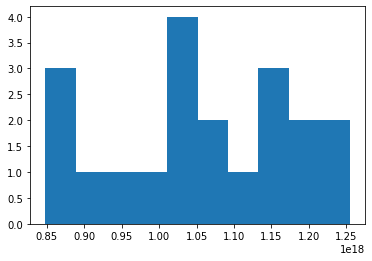

In [6]:
def estimate_dnf(N):
    success = 0
    for i in range(N):
        x = 2 * np.random.randint(2, size=M) - 1    # sample integers from [-1, 1]
        for clause in phi:
            mul = x[np.abs(clause) - 1] * clause
            if (mul > 0).all():
                success += 1
                break                # as soon as we find a satisifed clausule we finish
    return 2 ** M * (success / N)    # return expected number of satified formulas in general

N = 1000
REP = 20

sample_dnf = [estimate_dnf(N) for _ in range(REP)]
plt.hist(sample_dnf);

**Problem 4d (Monte Carlo counting ctd).** In this problem we use a different distribution on assignments, to overcome the difficulties arising in **4c**. 
 * How many assignments satisfy clause $C_i$?
 * How can we estimate the probability that a random assignment which satisfies $C_i$ does not satisfy any earlier clauses (i.e., $C_j$ for $j < i$)?
 * How can we estimate the number of assignments which satisfy $C_i$ but do not satisfy any earlier clauses?
 * How can we use the result of the previous question to construct an algorithm estimating the number of satisfying assignments?


In [31]:
#M = 4 # number of variables
#phi = [ [1,-3,4], [-1,2] ]

M = 64
phi = [[55, 3, -50, -57, 2, 51, -5, -56, -45, 1], [28, -1, -26, 35, 42, -43, 45, -56, -11, 6], [-18, 43, 1, 64, -34, 28, 48, -13, 29, 49], [-21, 12, 7, -49, -25, -45, 8, -51, 5, -26], [6, -26, 27, 51, 2, 9, 49, 29, -42, -35], [-12, 4, -32, -60, 2, 56, 31, 58, -19, -46], [-10, -52, 25, -8, -56, -24, -51, 20, 36, 22], [-64, -26, -36, -14, 3, 42, -20, -59, 25, 33], [-31, -33, 40, -29, -12, -49, 28, 11, 7, 22], [-25, 23, -17, -61, 34, 32, 24, -52, -21, -26], [-48, -42, -43, -24, 14, 50, -64, 60, 7, -53], [-1, 2, -61, -24, -53, 34, -13, 36, -46, 3], [3, -52, 60, 39, 9, 59, 57, 32, 6, -7], [-17, -28, -58, 33, 16, -22, -13, 26, 18, -11], [47, -39, 46, 40, -18, 24, 6, -23, -64, -22], [-6, 60, 35, 1, 52, 18, -33, 43, 45, -11], [57, -34, -32, 16, -41, -25, 37, 40, 43, -5], [58, -51, -40, 42, 5, 27, -41, 20, 32, 30], [-48, -11, -15, -14, -27, 17, -33, 55, -64, -51], [-11, -8, 48, 57, 42, 64, 40, -45, 13, -25], [-40, -39, 46, -36, -51, -58, 14, 7, -18, -6], [31, 38, -11, -45, -14, -9, -63, 27, -35, -46], [40, 11, 28, -26, -25, -20, -41, 16, 61, -32], [-35, 6, -58, 30, 62, -36, -7, -37, 38, 51], [-13, 58, 1, 14, 52, 8, 45, -49, -21, 51], [10, -62, -39, -57, 15, -40, 56, -31, -47, 23], [37, 22, -21, 52, -5, -19, -7, 50, 34, 9], [18, 14, -31, 27, -2, 5, 3, 48, 63, -34], [-43, 39, -29, 34, 60, -10, -61, -49, -42, 57], [-32, -29, -16, 53, -38, 52, -36, -62, -5, 45], [-28, 25, -31, -41, -44, -37, 20, 48, 59, 24], [49, -59, -13, -56, -29, -2, -45, -62, -38, -26], [-33, -31, 53, 64, 15, 17, 12, 50, 46, -54], [56, 57, 22, 4, 46, 21, 49, 14, 43, -41], [-8, 18, -21, -15, -42, -64, 45, 14, 13, -33], [-32, 62, 2, 10, -49, -64, 15, -35, -20, -17], [54, -64, -20, 37, -5, -26, -41, -35, 32, -25], [60, 58, -23, -43, -2, 15, 10, 9, 59, -45], [9, 29, -17, 45, -53, 18, 19, 50, 42, -61], [54, -51, 9, -52, -40, -37, -18, -59, 48, 3], [-32, -17, 38, 12, -27, 45, 57, -51, 56, 4], [-12, 62, -17, -50, -32, -45, -56, 46, 19, -61], [51, -27, 56, 45, 59, -25, 3, -18, 60, -44], [-50, 5, -10, 12, -23, -41, 31, -59, -35, 30], [-5, 18, -4, -63, 22, -40, 10, -62, 61, -35], [1, -10, 31, -41, 56, -17, -61, 22, 46, -14], [-45, 32, 54, -48, -25, 10, 31, -63, 38, -17], [50, -46, 44, -57, -45, -1, -63, 15, 4, 12], [-39, -28, 49, -9, 53, 25, 47, -6, 24, -36], [-41, 59, 13, 15, 21, -20, -19, 2, -22, 37], [-31, 23, -57, -38, 30, 59, 28, 6, 53, 26], [-38, -62, 14, 26, 12, 46, 10, 35, -18, -43], [20, -10, -48, -62, -17, -27, 49, -11, 59, 7], [-43, -46, -14, -31, -62, 52, -10, 40, -63, 32], [15, -12, 43, -19, -34, -25, -14, 62, 50, 61], [24, -52, 32, 61, 18, -44, 49, 29, 55, -57], [-27, 25, 55, -57, 12, 9, -43, 29, 36, 18], [13, -27, 21, -24, -8, 39, -60, 34, -11, 54], [-51, -3, 12, 26, -9, -23, -18, 28, 24, 11], [-1, -10, 9, 35, -55, -30, 48, 53, -32, -24], [-59, -58, -30, -46, 17, 11, 3, -18, -1, -50], [-61, -52, 17, -4, -44, -56, 64, 37, -47, 46], [28, 59, -23, 29, -5, -41, 39, 57, 2, 34], [-54, 56, 5, -20, -6, 13, 49, 28, -42, 25]]

For each clause $C_i$ we have $2^{M - len(C_i)} $ good assigments. What we do is to estimate for each $C_i$ number of good assignments for which $C_i$ is the first clause satisfied. Final result - number of satisfying assignments is a sum over those estimates for clauses $C_i$.

In [32]:
def get_val(x):
    return 1 if x > 0 else -1

def satisfying_vals(clause):
    vals = []
    for term in clause:
        vals.append(get_val(term))
    return vals

def satisfies(x, examined):
    for clause in examined:
        mul = x[np.abs(clause) - 1] * clause
        if (mul > 0).all():
            return True
    return False

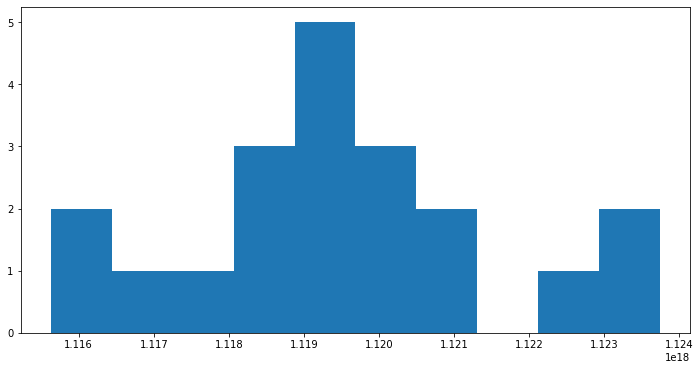

In [36]:
def estimate_dnf(N):
    success = 0
    examined = []
    for clause in phi:
        count = 0
        size = len(clause)
        vals = satisfying_vals(clause)
        for i in range(N):
            x = 2 * np.random.choice(2, size=M) - 1
            x[np.abs(clause) - 1] = vals
            if not examined or not satisfies(x, examined):
                count += 1
        examined.append(clause)
        success += 2 ** (M - size) * (count / N)
    return success
            
    
N = 100
REP = 20

sample_dnf = [estimate_dnf(N) for _ in range(REP)]        

plt.figure(figsize=(12, 6))
plt.hist(sample_dnf);

**Problem 4e (Monte Carlo counting ctd).** The esitimation method outlined in **4d** has several variants.
 * We could use the Monte carlo method for each clause $C_i$ separately, or we could also choose clause $C_i$ randomly in each sample.
 * We could sample more assignments from the clauses which have more satisfying assignments (in case if various clauses $C_i$ have different numbers of satisfying assignments).
 * Solution to Problem 4d suggests that each assignment satisfying $\phi$ should be accounted only for the first clause it satisfies. Another possibility is to count the number of clauses it satisfies, $d$, and account it with weight $1/d$ for each of these clauses.
 
There are 8 combinations. Which one of them it the most efficient (i.e., has the smallest variance for the given number of samples / computation time)? Guess the answer (preferably using theory) and verify your suspicions.